In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing, metrics, model_selection, linear_model

In [2]:
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-57ffe881-6074-44f9-ba71-d4a2ac29d1ff',
    'IBM_API_KEY_ID': 'EA1WL8YcHjlSBRFeDtR07CIUBlagQa_Q0YSVNgXcjQ1Z',
    'ENDPOINT': 'https://s3.eu-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'predictinglifeexpectancyusingmach-donotdelete-pr-wiiomeiwazafry',
    'FILE': 'Life_Expectancy_Data.csv'
}

In [3]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_75dedf163fee4ba8ab75cb70eb672d9d = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='EA1WL8YcHjlSBRFeDtR07CIUBlagQa_Q0YSVNgXcjQ1Z',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_75dedf163fee4ba8ab75cb70eb672d9d.get_object(Bucket='predictinglifeexpectancyusingmach-donotdelete-pr-wiiomeiwazafry',Key='Life_Expectancy_Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

my_data = pd.read_csv(body)
my_data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
len(my_data)

2938

In [5]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

<br>

## Preprocessing the Data

In [6]:
my_data = my_data.drop('Country', axis=1)
my_data.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [7]:
my_data.Status.unique()

array(['Developing', 'Developed'], dtype=object)

In [8]:
my_data.Status = my_data.Status.astype('category')

In [9]:
encoder = preprocessing.LabelEncoder()

In [10]:
my_data.Status = encoder.fit_transform(my_data.Status)
my_data.Status.unique()

array([1, 0])

In [11]:
my_data.isnull().sum()

Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [12]:
my_data = my_data.fillna(0)
my_data.isnull().sum()

Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

<br>

## Correlation Between Features

In [13]:
sns.set(rc={'figure.figsize':(20,25)})

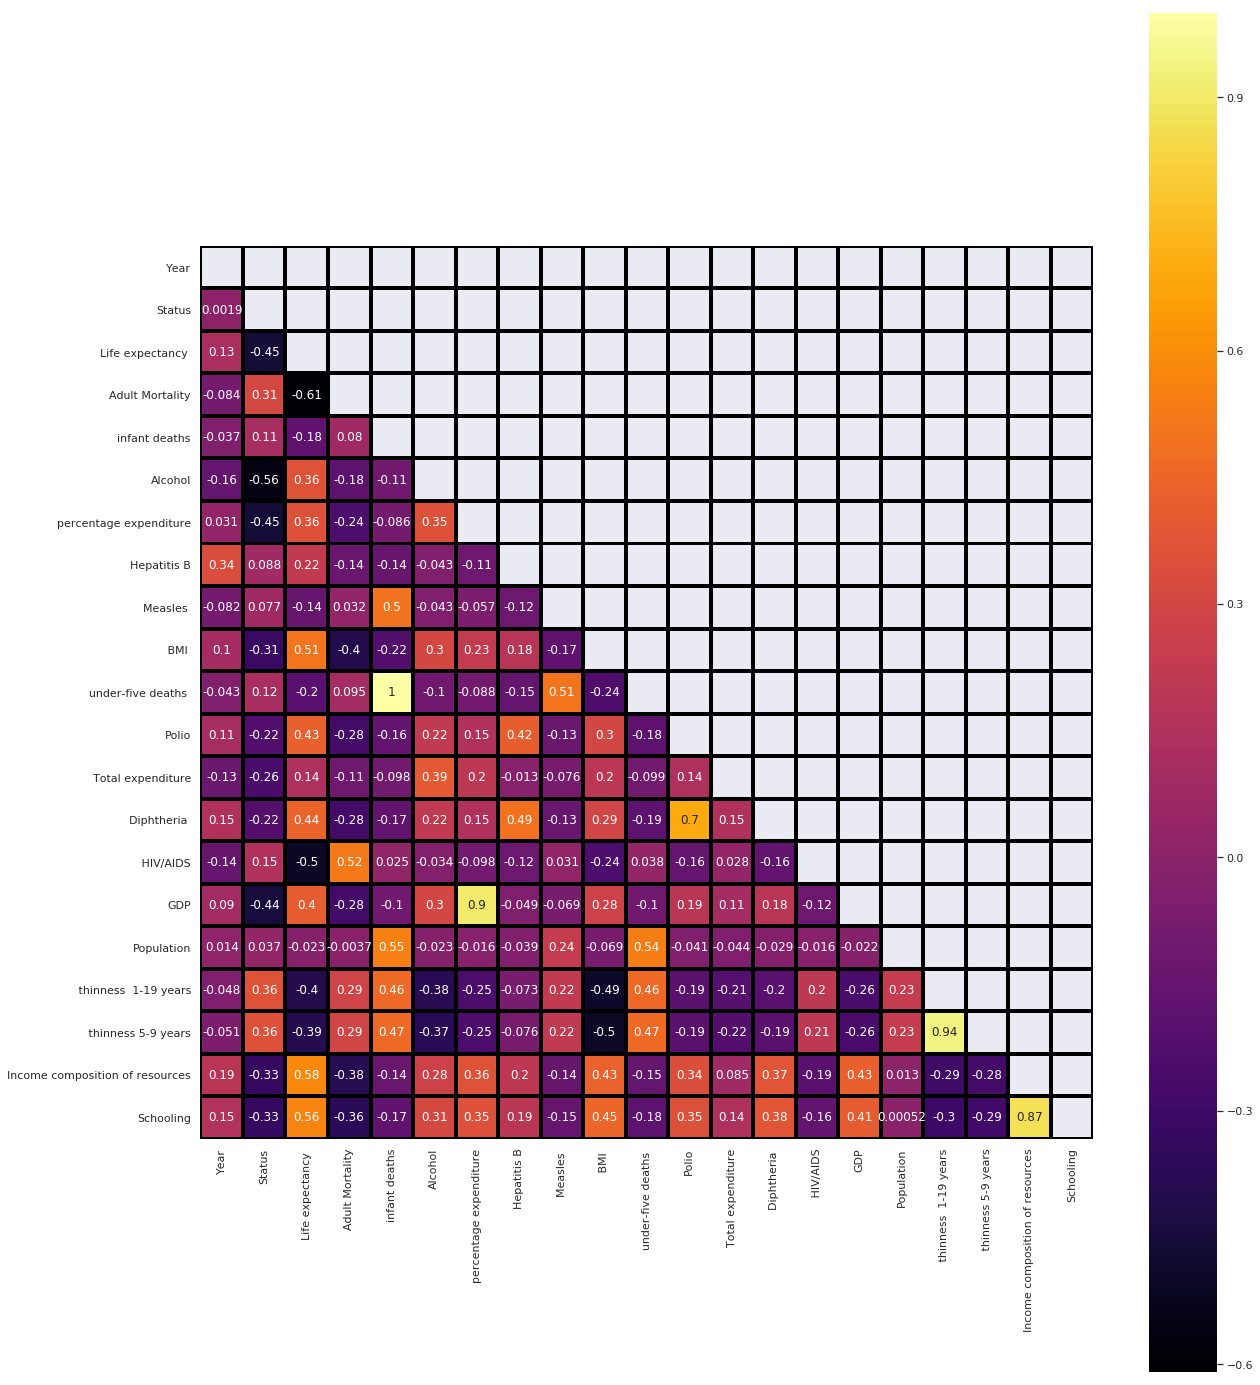

In [14]:
#Create correlation matrix for all variables in the dataframe

mat = np.triu(my_data.corr())
sns.heatmap(my_data.corr(), cmap='inferno', linewidths=3, linecolor='black', annot=True, square=True , mask=mat)

<br>

## Train Test Split

In [15]:
X_data = my_data.drop('Life expectancy ', axis=1)
X_data.head()

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,1,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,1,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,1,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,1,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,1,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [16]:
y_data = my_data['Life expectancy ']
y_data.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy , dtype: float64

In [17]:
scaler = preprocessing.MinMaxScaler()
X_data = scaler.fit_transform(X_data)

In [18]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_data, y_data, test_size=0.3, random_state=101)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2056, 20)
(882, 20)
(2056,)
(882,)


<br>

## Creating & Training the Regression Model

In [20]:
model = linear_model.LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=None)

In [21]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

<br>

## Making Predictions

In [22]:
y_pred = model.predict(X_test)

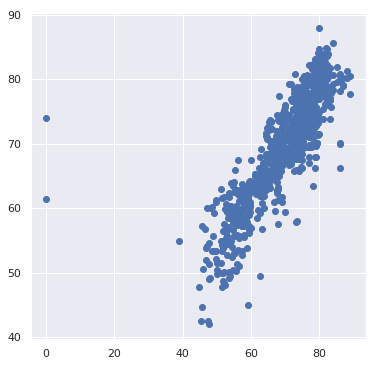

In [23]:
sns.set(rc={'figure.figsize':(6,6)})
plt.scatter(y_test, y_pred)

In [24]:
print('Intercept =', model.intercept_)
print('Coefficients = ', model.coef_)

Intercept = 61.427934194774245
Coefficients =  [-7.57306435e-02 -2.86933629e+00 -1.12708212e+01  2.48724575e+02
  5.23369029e+00 -2.50598096e+00  1.01265761e+00 -5.49158793e-02
  3.82141575e+00 -2.60330180e+02  3.02175675e+00 -1.43290011e+00
  1.89508658e+00 -2.54937561e+01  9.79462738e+00 -6.39853907e-01
 -2.83998201e+00  7.47505094e-01  6.32105793e+00  4.25070417e+00]


In [25]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score: ', metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  3.359201496889888
Mean Squared Error:  28.427788786948156
Root Mean Squared Error:  5.3317716367965495
R2 score:  0.7083655712078845


<br>

<br>

<br>

In [26]:
!pip install watson-machine-learning-client

In [27]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-08-02 16:17:01,409 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [28]:
wml_credentials={
  "apikey": "E0djLKsM__lSlLkPpohJKFYr4plNoaqAP3Fj701qXiKq",
  "instance_id": "69233e16-90f4-4399-acbf-a0fad74c3e77",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [29]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [30]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Shubham", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "shubhamdua02@gmail.com", 
               client.repository.ModelMetaNames.NAME: "LifeExpectancy_RegressionModel"}

In [31]:
model_artifact = client.repository.store_model(model, meta_props=model_props)

In [32]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [33]:
published_model_uid

'3a92524f-d921-40de-9131-1ec8c069bd11'

In [34]:
deployment = client.deployments.create(published_model_uid, name="LifeExpectancy_RegressionModel")



#######################################################################################

Synchronous deployment creation for uid: '3a92524f-d921-40de-9131-1ec8c069bd11' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='ff28795f-3381-4e5f-bac9-6ad0b4a60e02'
------------------------------------------------------------------------------------------------




In [35]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [36]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/69233e16-90f4-4399-acbf-a0fad74c3e77/deployments/ff28795f-3381-4e5f-bac9-6ad0b4a60e02/online'